## Project Overview
### Train and test a classification model(s) on the Default dataset.
Before training a model on this dataset, a good understanding of each explanatory variable (features) is vital.
### Definition of each feature

 - **limit_bal**: limit balance also known as credit limit is the **credit limit** after applying for a credit card determined by the credit card issuer.
 - **sex:** Sex of the credit card owner which is either 1 for **Male** or 2 for **Female**
 - **education:** Highest level of education for the credit card owner. where 1 = graduate school; 2 = university; 3 = high school; 4 = others
 - **marriage:** Marital status of credit card owner where 1 = married; 2 = single; 3 = others
 - **age:** Ages of card owners.
 - **pay_0 to pay_6:** History of past monthly pay records starting from April(pay_0) to September(pay_6) for each card owner.
    statuses are 0: pay duly, 1: payment delay for one month, 2: payment delay for two months.
 - **bill_amtt1 to bill_amnt6** represents amount of bill statement from April(bill_amt1) to September(bill_amt6). 
    **Bill statement** is a periodic statement that lists all the payments, purchases and other debits and credits during the billing cycle.
 - **pay_amt1 to pay_amt6** is amount paid in the previous month. From April(pay_amt1) to September(pay_amt6)
 - **defaulted:** To defauult means failure to pay a debt on the agreed upon date. IN this case, creditors mostly raise interest rates or decrese the credit limit.
        
Since defaulted is the target variable in this case, suitable models will be used to train and test the other explanatory variables and see which model predicts with highest accuracy on the dataset.

In [1]:
# Importing python libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing needed packages
These python libraries all have a vital role to play from the point of preprocessing, exploratory analysis to the point of making predictions.
- Numpy is the main library used during computations as it eases the implementation of complicated functions by offering useful linear algebra and contains a powerful array objects.
- Pandas, matplotlib and Seaborn are python libraries used used for data manipulation and analysis.

In [2]:
# Imports the dataset using pandas and converts it to a pandas dataframe.
data = pd.read_csv('..\..\datasets\defaults.csv')

In [3]:
# The inbuilt function head() prints out the first 5 records in the dataframe.
data.head(5)

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Performing Data cleaning and preprocessing.
At this point, cleaning is done by ensuring there are no missing values or 
wrong input values by following the dataset description and the data given. 

In [4]:
data.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


 - The inbuilt function describes gives more details for all numerical features and since all the features here are numerical, the description is given for all of them.
 - prints out the counts of all the records for each feature, mean, standard deviation, min, max and percentile values. This helps better understand the nature of the explanatory variable.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_0        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


Information printed for the dataframe prints out data types of all the features and also missing values could be determined from here since the total number of records is printed out for each feature.

In [6]:
# check for null values
data.isnull().any().any()

False

The inbuilt function isnull() prints out any null(undefined or empty space) values and which feature the record belongs. 
In this case there is no null value which therefore helps proceed to the next level.

### Performing Exploratory Analysis on some of the features
Exploratory data analysis is the process of bringing out relatonships between dependent features and the target feature, gives more details about the structure of a particular feature and also explanatory variable against explanatory variables.
Some of these visualizations help bring out more stories from the data and also much more understanding by the different features.  
EDA will be performed on pay_0(History of past monthly pay records starting from April), bill_amt1(amount of bill statement from April) and pay_amt1(amount paid in the previous month. From April) to see how these features can infleunce the target and their relationship with other features.

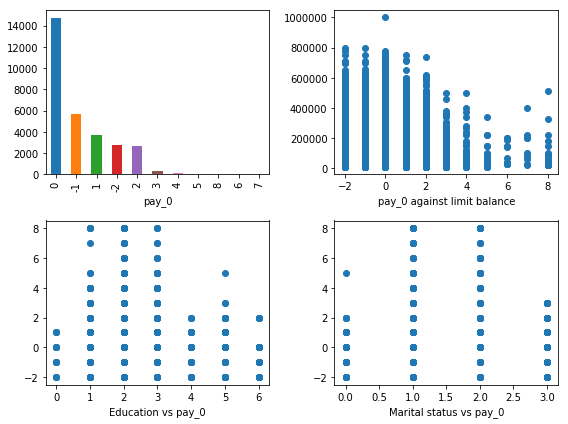

In [7]:
# Subplots showing visualizations of pay_0(past monthly pay records for April )
# bar chart of pay_0 vs counts for each status
plt.rcParams["figure.figsize"] = (8,6)
plt.subplot(221)
data['pay_0'].value_counts().plot('bar')
plt.xlabel('pay_0')

# Graph of pay_0 vs limit_bal
plt.subplot(222)
plt.scatter(data.pay_0, data.limit_bal)
plt.xlabel('pay_0 against limit balance')

# Graph of education vs pay_0 
plt.subplot(223)
plt.scatter(data.education, data.pay_0)
plt.xlabel('Education vs pay_0')

# Graph of married vs pay_0
plt.subplot(224)
plt.scatter(data.marriage, data.pay_0)
plt.xlabel('Marital status vs pay_0')

plt.tight_layout()

### Observatins from above visualizations for pay amount and other features
 - The fisrt graph shows the frequency of each status for this feature. The highest being 0 which is card owners pay before due time followed by those who pay a month before the due date (-1). This means there are lower chances for a credit card to be defaulted as most of the card owners always pay their debts before or at least a month later.
 - Graph of pay_0 vs limit_balance. This graph shows most of the card owners fall under the -2 to 2 status of loan payment with account balance ranging from 600,000 to 800,000 UD dollars. There is an outlier of a cingle credit card owner with a limit balance of 100,000 US dollars and falls under the 0 status which is he pays his loans on the agreed upon date(due time). Also, card owners with payment status ranging from 4 to 8 are seen to have smaller limit balance offered by the creditor. This could therefore be a good strategy used to reduce more accounts from being defaulted which is by reducing loan offers to credit card owners with smaller limit balance.
 - Graph for education vs pay_0. This graph shows the which category of degree holders turn to pay before or after the due date. In this case, graduate school(1),university(2) and high school(3) turn to pay after the due date mostly 8 months after the agreed upon date. Whereas other categories turn to pay earlier and or few months after the agreed upon time.
 - Graph for married vs pay_0. From this graph, category 1 and 2 turn to pay months after the agreed upon time. These two categories 1 and 2 will have higher chances for their credit cards to be defaulted unlike the other categories. 
 

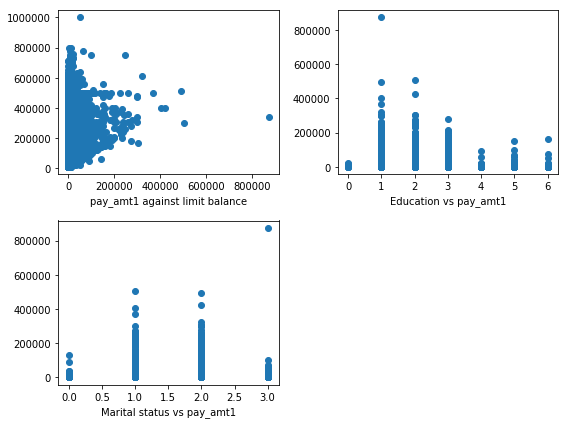

In [8]:
# subplots showing graphs of pay_amt1(bill statements for the April) vs other features.
# scatter plot of pay_amt1 vs limit balance
plt.rcParams["figure.figsize"] = (8,6)
plt.subplot(221)
plt.scatter(data.pay_amt1, data.limit_bal)
plt.xlabel('pay_amt1 against limit balance')

# graph of education vs pay_amt
plt.subplot(222)
plt.scatter(data.education, data.pay_amt1)
plt.xlabel('Education vs pay_amt1')

# graph of marriage vs pay_amt1
plt.subplot(223)
plt.scatter(data.marriage, data.pay_amt1)
plt.xlabel('Marital status vs pay_amt1')

plt.tight_layout()

### Observations from the visualizations between pay amount and other features.
- The graph for pay_amt1 vs limit_bal shows the amount paid in the previews month by the credit card owner. In this case, owners with lower limit balnace turn to pay smaller amounts except for an exceptional case where the limit balance is 34ok and the 873k US dollars. 
 - The graph for education vs pay_amt1 shows category 1 and 2 had higher previous payments made. These categories are not likely to have their credit cards being defaulted since they mostly meetup to the agreed upon deadline.
 - The graph marriage against pay_amt1 shows which category of card paid their loans in the previous month. Category 1 and 2 are therefore the highest categories who made a payment in the previous months where as category 0 and 3 turned to make little or no payments in the previous month with an exception under category 3 making payments of 100,000 US dollars in the previous month.

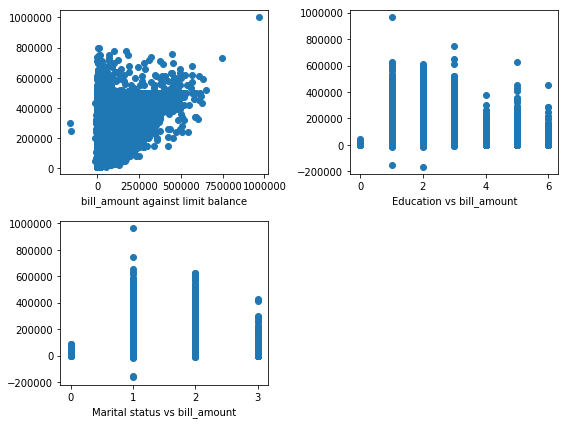

In [9]:
# subplots showing graphs between amount of bill statements for April and other features
plt.rcParams["figure.figsize"] = (8,6)
plt.subplot(221)
plt.scatter(data.bill_amt1, data.limit_bal)
plt.xlabel('bill_amount against limit balance')

plt.subplot(222)
plt.scatter(data.education, data.bill_amt1)
plt.xlabel('Education vs bill_amount')

plt.subplot(223)
plt.scatter(data.marriage, data.bill_amt1)
plt.xlabel('Marital status vs bill_amount')

plt.tight_layout()

### Observations from Bill amount(Bill statement) and other features
 - Graph between bill amount and limit balance gives a visualization showing how the bill statements of credit card owners relates to the limit balance. Most of the card owners have low limit balance and also lower amounts of bill statments seen with some outliers with negative values for bill statements. Since bill statements is the periodic statement that lists all the payments, purchases and other debits and credits during the billing cycle. Negative amounts shows the bank owes you money which could be a refund. The other outlier is the highest limit balance crad owner with also high bill statement. Since he has high limit balance, he can therefore clear it off.
 - Graph for education vs bill amount shows all the categories almost have the same range of money as the bill statement but with some few outliers where their bill statements are negative which means the bank owes them some money while one is very high at the top under category 1.
 - Graph for marital status vs bill amount brings out the category that has high bill statements which are category 1 and 2 with an outlier at 100k. This therefore shows that category 1 and 2 have more bill statements than the others 0 and 3.

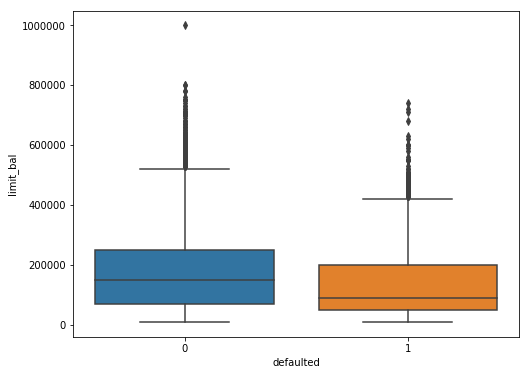

In [10]:
# Box plot to see relationship between limit balance and defaulted accounts.
_ = sns.boxplot(x='defaulted', y='limit_bal', data=data)
plt.show()

### Box plot between Limit balance and defaulted credit cards
 - From above graph, there are two categories under the defaulted feature which are 0(not defaulted) and 1(defaulted) credit cards. 
 - This box plot shows that most credit card owners with limit balance from 100k to 200k are most likely to be defaulted though with some exceptions with very highlimit balance still being defaulted.
 - For non defaulted credit card owners, their mean and standard deviation are ewual since the plot is symmetrical.This plot also shows that limit balance values from 100k to 300k can also have a non defaulted account. 


### Training and Testing the data
Machine Learning models to be tested and why!
 - Logistic Regression: This is one of the good fits in this case as the target feature is discrete ie 0s and 1s. 
 - K-Nearest Neighbors: KNN is a non parametric method used for predictions and the output(class) is classified by a plurality vote of its neighbors. 
 - Decision tree: Uses a decision tree as a predictive model which uses a particular item features(or observations) represented as branches to make conclussions(predictions) about the target variable represented in the leaves.

## Logistic Regression with and without regularization

In [11]:
# Logistic regression is a scikit learn model so it must be imported from sklearn, train_test_split and also accuracy score are all imported from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.iloc[:, 1:24].values
print('X: ', type(X), X.shape)
y = data.iloc[:, 24].values
print('y: ', type(y), y.shape)

# Splitting the data into train and test set in the ratio 80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
print("Accuracy of the logistic regression model on the training and test set is" )

clf_lr = LogisticRegression(solver='liblinear')

clf_lr.fit(Xtrain, ytrain)

y_pred_train = clf_lr.predict(Xtrain)
print('[Train] Accuracy score is: ', round(accuracy_score(ytrain, y_pred_train), 4))
      
y_pred_test = clf_lr.predict(Xtest)
print('[Test] Accuracy score is: ', round(accuracy_score(y_pred_test, ytest), 4))

X:  <class 'numpy.ndarray'> (30000, 23)
y:  <class 'numpy.ndarray'> (30000,)
Accuracy of the logistic regression model on the training and test set is
[Train] Accuracy score is:  0.7783
[Test] Accuracy score is:  0.7803


### Findings from above model.
 - After splitting the data into test and train, logistic regression model was used which gave an accuracy score of 0.7783 on th train set and an accuracy score of 0.7803 for the test set.
 - This score is the best for a machine learning predictions. This therefore is the reason why when making predictions, two or more models are always tested to see which produces best accuracy results without overfitting the model.

#### With Regularization
This is called parameter tuning where the model parameters are changed from the default values so as to better optimize the model.

In [12]:
# logistic regression classifier with regularization set to l1.
clf_lr2 = LogisticRegression(penalty='l1', solver='liblinear')

clf_lr2.fit(Xtrain, ytrain)

y_pred_train2= clf_lr2.predict(Xtrain)
print('[Train] Accuracy score is: ', round(accuracy_score(ytrain, y_pred_train2), 4))
      
y_pred_test2 = clf_lr2.predict(Xtest)
print('[Test] Accuracy score is: ', round(accuracy_score(y_pred_test2, ytest), 4))

[Train] Accuracy score is:  0.81
[Test] Accuracy score is:  0.8128


### Findings from Logistic Regression model with Regularization
 - Logistic regression model comes with some parameters including penalty. Penalty by default comes with the logistic regression model as l2. Regularixation is a techniwue used to prevent overfitting the model. When L1 is used, the regularization is called Lasso Regression. L1 not only helps reduce model overfitting, it also makes it's data sparce when most of it's cells are zero.
 - Thaccuracy score using regularization is higher and without model overfitting. This could therefore be a good option for predictions to be done with this data as the accuracy scores of the model is >0.8 for both train and test set.

### Considering K-Nearest Neighbors model.

In [13]:
# importing the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# A classifier from the KNN model
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# n_neighbors is the default number of neighbors to be considered from which the target value will then be place to the class with highest count. 

clf_knn.fit(Xtrain, ytrain)

y_pred_knn = clf_knn.predict(Xtrain)
print('[Train] Accuracy score using KNN Model is: ', round(accuracy_score(ytrain, y_pred_knn), 4))
      
y_pred_knn2 = clf_knn.predict(Xtest)
print('[Test] Accuracy score using KNN Model is: ', round(accuracy_score(y_pred_knn2, ytest), 4))

[Train] Accuracy score using KNN Model is:  0.8168
[Test] Accuracy score using KNN Model is:  0.7567


### Observations from KNN Model
 - Using the KNN model, the accuracy score for the train data is a good one with value 0.8163 whereas the test accuracy score is a bit lower with value 0.7567.
 - The fall in accuracy score when testing the model shows that is the accuracy other inputs will have which is not a good option for a machine learning model.
 - This therefore means KNN model is not a suitable model for this data.

### Implementing parameter tuning to optimize the KNN model by improving accuracy score without overfitting the model.
This will be done by considering 4 different values of the n-neighbors parameter(5,7,9,11) which will print out the best accuracy score. 

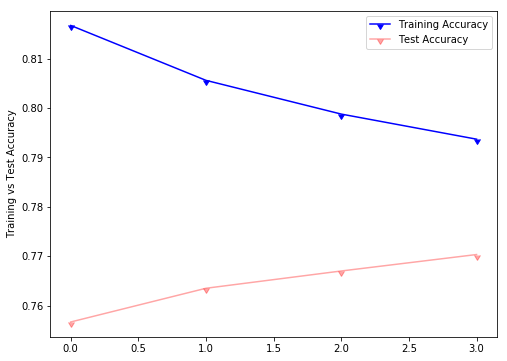

In [14]:
#number of neighbors to consider for the parameter tuning also called K value
neighbors = [5, 7, 9, 11] 
# this parameter takes only set of odd numbers which is why the array has only defined odd numbers to be considered
training_accuracy = []
test_accuracy = []

for i in neighbors:
    
    clf = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    
    # fit on the training set
    clf.fit(Xtrain, ytrain)
    
    # predict on training set
    y_predict_training = clf.predict(Xtrain)
    
    # predict on test set
    y_predict_test = clf.predict(Xtest)
    
    # save training accuracy for the diff k values
    tr_accuracy = accuracy_score(y_predict_training, ytrain)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for these neighbors
    tst_accuracy = accuracy_score(y_predict_test, ytest)
    test_accuracy.append(tst_accuracy)
    
#Plot of training vs test accuracy 
#This gives a visualization of how large the difference between these two accuracies is
#If there is overfitting or underfitting 
training_plot, = plt.plot(training_accuracy, 'b',  marker=11)
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35,  marker=11)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

### Observations from above graph
 - Parameter tuning is a vital process during the training and testing of a machine learning model as it better optimizes the model without overfitting.
 - From the above visualization, the training accuracy starts at 0.81 for n_neighbor of 5 and drops linearly as the number of n_neighbors keeps increasing.
 - The test accuracy rather increases as the number of n_neighbors increases and when at 9, it starts to fall. 
 - Since the data of most interest is the test data, the n_neighbors will therefore be taken as 9 which produces an optimized value for test set.
 - Unfortunately this accuracy score is not upto 0.8 for the test set which is the preferable minimal accuracy score for a machine learning model. 

### Considering Decision tree

In [15]:
# Importing DecisionTree classifier from sklearn.
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_dt.fit(Xtrain, ytrain)


y_pred_dt = clf_dt.predict(Xtrain)
print('[Train] Accuracy score using Decision Tree Model is: ', round(accuracy_score(ytrain, y_pred_dt), 4))
      
y_pred_dt2 = clf_dt.predict(Xtest)
print('[Test] Accuracy score using Decision Tree Model is: ', round(accuracy_score(y_pred_dt2, ytest), 4))

[Train] Accuracy score using Decision Tree Model is:  0.9995
[Test] Accuracy score using Decision Tree Model is:  0.7293


### Observations from Decision Tree Model
 - The accuracy score of the Decision tree model on the train set is 0.999 whereas the accuracy score for the test data is just 0.7248. 
 - There is model overfitting as the model turns to train the data too well thereby producing accuracy score of 0.999 with minimal modelling error.
 - Due to the model being too complex and trying to be perfect, the test values turned to be too low as the predictions were mostly faulty.
 - Decision trees is therefore not a good option for this case as there is model overfitting.

### How to optimize this Decision Tree model
- Overfitting turns to be common when implementing a decision tree model on large data. This is due to the long decision chain that results from many branches and leaves that were expanded from the data especially when the dataset has many explanatory variables(features)
- One way to resolve this issue of model overfitting is by implementing hyper parameter tuning or Pruning
- **Pruning** is a techniwue of reducing the size of a decision tree by removing some sections from the tree that do not have the power to classify instances. 
- In this case, the Decision tree model will be optimized by modifying default parameter values which is a means of reducing the tree size and the depth as the more the tree grows, the more the algorithm turns to be more complex thus resulting to model overfitting.
- Two main parameters will be tested and that with optimal solution will be used to optimize the model. They are:
- **Max_depth:** This integer value defines the maximum depth of the tree.
- **Min_samples_split:** This is the minimum number of samples required to split a node.  


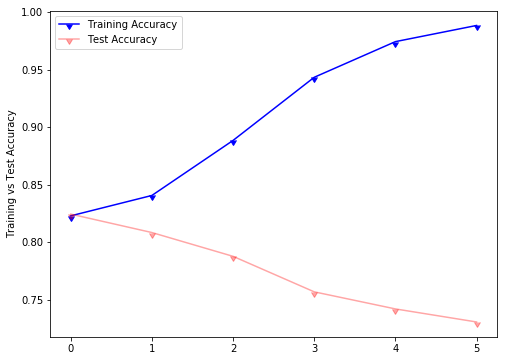

In [16]:
# Implementing a number of tree_depth values to see which produces the best accuracy score without overfitting the model
tree_depth = [5, 10, 15, 20, 25, 30] 
training_accuracy = []
test_accuracy = []

# loop over multiple tree_depth values
for i in tree_depth:
    
    clf2 = DecisionTreeClassifier(criterion='entropy',max_depth = i, random_state=0)
    
    # fit on the training set
    clf2.fit(Xtrain, ytrain)
    
    # predict on training set
    y_predict_training = clf2.predict(Xtrain)
    
    # predict on test set
    y_predict_test = clf2.predict(Xtest)
    
    # save training accuracy 
    tr_accuracy = accuracy_score(y_predict_training, ytrain)
    training_accuracy.append(tr_accuracy)
 
    tst_accuracy = accuracy_score(y_predict_test, ytest)
    test_accuracy.append(tst_accuracy)

    
#Plot of training vs test accuracy 
#This gives a visualization of how large the difference between these two accuracies 
#If there is overfitting or underfitting 

training_plot, = plt.plot(training_accuracy, 'b',  marker=11)
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35,  marker=11)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

### Observations from the graph above
 - To be able to know which number best fits the model as the tree depth, an array of intergers is implemented to see which will produce best accuracy score without overfitting or underfitting the model.  
 - This graph shows the best tree depth for ths model is 10. This is because increasing values after the value 10 turns to overfit the model ad the train accuracy score increases while the test accuracy score reduces.

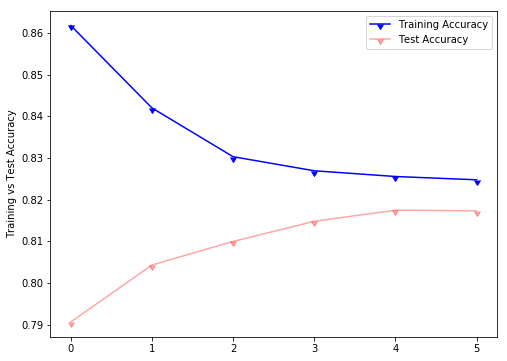

In [17]:
#number of minimum sample splits to consider for the parameter tuning.
min_sample_split = [50, 100, 200, 300, 400, 500] 
training_accuracy = []
test_accuracy = []

for i in min_sample_split:
    
    clf3 = DecisionTreeClassifier(criterion='entropy', min_samples_split = i, random_state=0)
    
    # fit on the training set
    clf3.fit(Xtrain, ytrain)
    
    # predict on training set
    y_predict_training = clf3.predict(Xtrain)
    
    # predict on test set
    y_predict_test = clf3.predict(Xtest)
    
    # save training accuracy 
    tr_accuracy = accuracy_score(y_predict_training, ytrain)
    training_accuracy.append(tr_accuracy)
    
    tst_accuracy = accuracy_score(y_predict_test, ytest)
    test_accuracy.append(tst_accuracy)
    
    
#Plot of training vs test accuracy 
#This gives a visualization of how large the difference between these two accuracies is
#If there is overfitting or underfitting 
training_plot, = plt.plot(training_accuracy, 'b',  marker=11)
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35,  marker=11)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

 - Minimum sample split is the minimum number of samples required to split a node. Increasing this number more makes the model have a shorter depth and could end up being too simple for the data thereby underfitting the data instead. 
 - From above, an increase in the number of minimum splits increases the test accuracy while reducing the train accuracy thereby reducing overfiiting. 
 - Further increasing this value instead turn to make the model underfit the data as the train accuracy score if moving further will reduce more and the model also becomes to simple to train the data.
 - The value that is a best fit for this model is 300 as the train and test accuracy scores are high. 


In [18]:
# Optimized model for the decision tree.
# Parametersmodified are min_samples_split and max_depth
clf_dt2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=300, max_depth=10, random_state=0)
clf_dt2.fit(Xtrain, ytrain)


ypred_dt = clf_dt2.predict(Xtrain)
print('[Train] Accuracy score using Decision Tree Model with parameter tuning is: ', round(accuracy_score(ytrain, ypred_dt), 4))
      
ypred_dt2 = clf_dt2.predict(Xtest)
print('[Test] Accuracy score using Decision Tree Model with parameter tuning is: ', round(accuracy_score(ypred_dt2, ytest), 4))

[Train] Accuracy score using Decision Tree Model with parameter tuning is:  0.8247
[Test] Accuracy score using Decision Tree Model with parameter tuning is:  0.8177


### Findindings after parameter tuning
 - After creating a classifier with modified parameter values, Decision tree model no longer overfits the data and produces the best accuracy score compared to the other models above.

### Classification report for Decision Tree after hyper parameter tuning.

 - Precision: Ability of a classiifer not to label an instance positive that is actually negative. 
 - Recall: Ability of a classifier to find all positive instances for each class it is defined
 - F1 score: Weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
 - Support: Number of actual occurrences of the class in the specified dataset

In [19]:
from sklearn.metrics import classification_report

print("[Training Classification Report:]")
print(classification_report(ytrain, ypred_dt))

print("[Test Classification Report:]")
print(classification_report(ypred_dt2, ytest))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18681
           1       0.69      0.38      0.49      5319

    accuracy                           0.82     24000
   macro avg       0.77      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5309
           1       0.35      0.66      0.46       691

    accuracy                           0.82      6000
   macro avg       0.65      0.75      0.67      6000
weighted avg       0.88      0.82      0.84      6000



## Conclussions
 - Considering the three models Logistic regression, K-Nearest Neighbors and Decision trees, the model with the best accuracy score after implementing parameter turning is Decision Tree with hyperparameter tuning.
 - This model has best accuracy scores and because there is no model overfitting makes it the best option in this case with training accuracy 0.824 and 0.8177 accuracy for the test set.
 - The best model for this problem is therefore **Decision Tree with hyperparameter tuning** by modifying the minimum sample split number and the depth of the tree.